CODESOFT  
AUTHOR : SUNITA SAHU  
ASSIGNMENT PROJECT 4 : SALES PRICE PREDICTION   
AIM : The aim of a sales price prediction project is to forecast future sales prices using historical data and market trends, helping businesses optimize pricing strategies, improve revenue forecasting, and enhance inventory management.

-------------------------------------------------------------------------------------------------------------

This code imports the necessary libraries and suppresses future warnings:

pandas: A library for data manipulation and analysis.  
numpy: A library for numerical computations.  
warnings: A module to handle warnings.  
warnings.filterwarnings("ignore"): Suppresses warnings categorized as future warnings, helping to clean up the output by ignoring less critical messages about future changes in the libraries used.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

LOADING THE DATASET FROM MEMORY

In [3]:
df_salesprice = pd.read_csv("salespredictionadvertising.csv")
df_salesprice.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df_salesprice.shape

(200, 4)

In [12]:
df_salesprice.columns.values.tolist()
df_salesprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df_salesprice.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df_salesprice.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

This code generates a series of box plots to visualize the distribution of sales prices for different media channels (TV, Newspaper, and Radio) in the `df_salesprice` DataFrame using `matplotlib` and `seaborn`. It starts by importing the necessary libraries for plotting. Then, it creates a figure with three vertically stacked subplots, each having a specified size. For each subplot, it generates a box plot that displays the spread and outliers of the sales price data for 'TV', 'Newspaper', and 'Radio' respectively. Finally, it adjusts the layout of the plots to ensure they fit neatly within the figure area, avoiding any overlap or clipping of the plots.

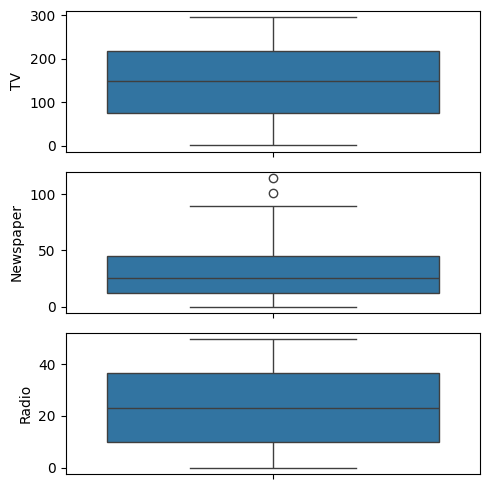

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_salesprice['TV'], ax = axs[0])
plt2 = sns.boxplot(df_salesprice['Newspaper'], ax = axs[1])
plt1 = sns.boxplot(df_salesprice['Radio'], ax = axs[2])
plt.tight_layout()

This code generates a distribution plot using seaborn (`sns.distplot`) to visualize the distribution of sales prices for the 'Newspaper' column in the `df_salesprice` DataFrame. The distribution plot provides insights into the underlying distribution of the data, including its central tendency, spread, and skewness.

<Axes: xlabel='Newspaper', ylabel='Density'>

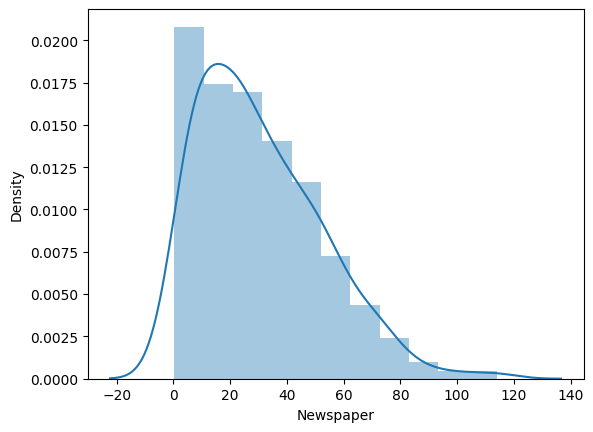

In [15]:
sns.distplot(df_salesprice['Newspaper'])

The code first imports the necessary libraries (`pandas`, `numpy`, and `warnings`) and suppresses future warnings for cleaner output. It then generates a 3D scatter plot to visualize the dataset, plotting sepal length, sepal width, and species. Next, it calculates and visualizes the confusion matrix, comparing true and predicted labels, with a heatmap displaying counts of correctly and incorrectly classified instances for each species ('Setosa', 'Versicolor', 'Virginica'). The next segment of code generates box plots to visualize the distribution of sales prices for different media channels (TV, Newspaper, Radio) in the `df_salesprice` DataFrame, ensuring plots are neatly arranged without overlap. Finally, the code calculates the interquartile range (IQR) for the 'Newspaper' column and uses it to determine the lower and upper bounds for detecting outliers, identifying values significantly different from the majority of the data.

In [17]:
iqr = df_salesprice.Newspaper.quantile(0.75) - df_salesprice.Newspaper.quantile(0.25)
lower_bridge = df_salesprice["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df_salesprice["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


This code creates a copy of the `df_salesprice` DataFrame named `data` and then caps the values in the 'Newspaper' column at 93 if they are greater than or equal to 93. Afterward, it generates a box plot using seaborn (`sns.boxplot`) to visualize the distribution of the capped 'Newspaper' column. The box plot displays the median, quartiles, and any outliers present in the data, providing a summary of the distribution's central tendency and spread.

<Axes: ylabel='Newspaper'>

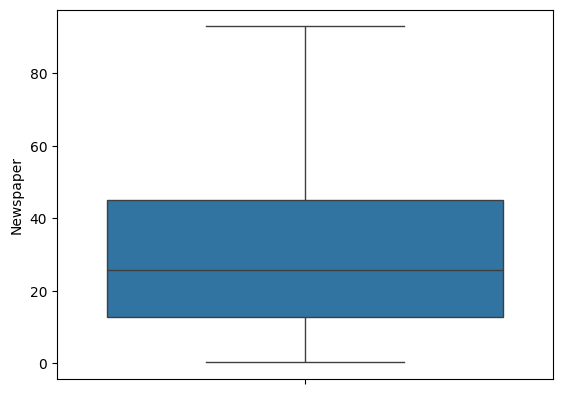

In [29]:
data = df_salesprice.copy()
data.loc[data['Newspaper']>=93, 'Newspaper']=93
sns.boxplot(data['Newspaper'])

This code generates a box plot using seaborn (`sns.boxplot`) to visualize the distribution of sales values in the 'Sales' column of the DataFrame `data`. The box plot displays the median, quartiles, and any outliers present in the sales data, providing a summary of the distribution's central tendency and spread.

<Axes: ylabel='Sales'>

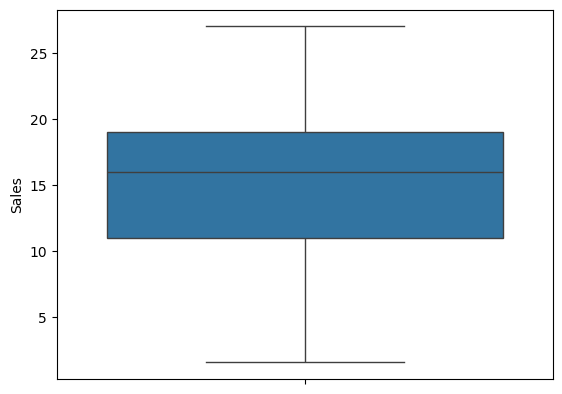

In [28]:
sns.boxplot(data['Sales'])

This code generates a pair plot using seaborn (`sns.pairplot`) to visualize the relationship between the sales ('Sales') and advertising expenditures ('TV', 'Newspaper', 'Radio') in the DataFrame `data`. Each scatter plot in the pair plot represents the relationship between sales and one of the advertising channels. The pair plot helps visualize potential correlations or patterns between sales and advertising spending across different channels.

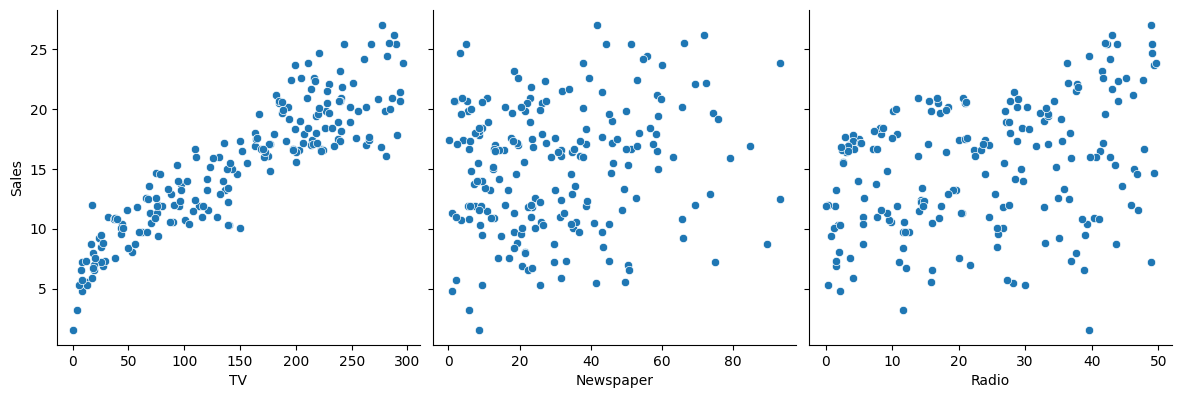

In [33]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

This code generates a heatmap using seaborn (`sns.heatmap`) to visualize the correlation matrix of the variables in the DataFrame `data`. The heatmap represents the strength and direction of correlations between pairs of variables using color intensity, with higher values indicating stronger correlations. The parameter `cmap="Blues"` specifies the color map to use, while `annot = True` displays the correlation coefficients as annotations within the heatmap.

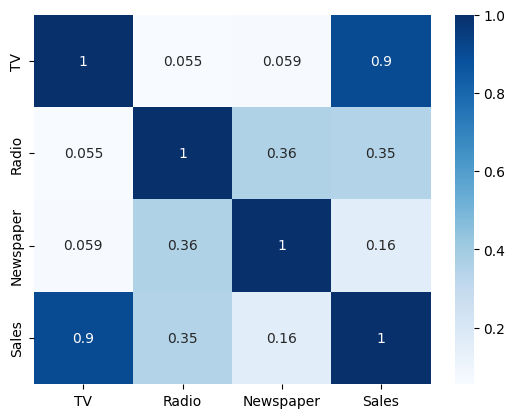

In [48]:
sns.heatmap(data.corr(), cmap="Blues", annot = True)
plt.show()

This code identifies the important features in the `df_salesprice` DataFrame by selecting variables that have a correlation coefficient with the 'Sales' column greater than +0.5 or less than -0.5. It creates a list of these important features and prints them. These features are likely to have a strong linear relationship with sales, making them potentially influential predictors.

In [49]:
important_features = list(df_salesprice.corr()['Sales'][(df_salesprice.corr()['Sales']>+0.5)|(df_salesprice.corr()['Sales']<-0.5)].index)
print(important_features)

['TV', 'Sales']


This code assigns the values of the 'TV' column from the DataFrame `data` to the variable `x` and the values of the 'Sales' column to the variable `y`. Then, it reshapes the `x` variable into a 2D array with one column and as many rows as necessary, using the `reshape()` function with `-1` as the first dimension, which indicates that the number of rows should be inferred from the length of the original array. This reshaping is often required for compatibility with certain machine learning algorithms that expect input data in a specific format.

In [51]:
x = data['TV']
y =  data['Sales']
x = x.values.reshape(-1,1)
x


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [52]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [53]:
print(x.shape, y.shape)

(200, 1) (200,)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)
print(x_train.shape, y_train.shape)

(134, 1) (134,)


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [58]:
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
print(knn_train_pred, knn_test_pred)

[10.2  19.74 11.44 10.22 19.42 15.4  18.3  19.3  17.92 17.78 11.44 19.76
  8.5  20.56 17.92 11.44 19.58 18.64  9.94 20.34 19.88 23.26 19.58 19.02
 10.2  19.54 16.9  17.24 19.54 19.74 20.64 14.2   5.96 12.3  19.3  13.6
 13.24 19.02  5.96  9.92 20.18  8.12 12.3  21.52  5.26  9.94 14.32 20.18
 19.02 13.9  20.3  11.74  9.92  6.34  7.74 18.12 17.24 17.92 20.54 12.22
 17.42 20.56  7.86 17.78 19.42 18.68 11.04 20.46 14.46 19.6  20.56 11.96
 19.76 12.48 17.94 20.56  8.12 17.92 17.94 19.74 13.58 11.44  5.96 13.6
 13.66  9.66 14.46 23.38 11.62  5.96  8.96  9.54 19.82 10.2  11.04 10.2
 12.22 11.44 11.96 19.58 19.12 20.24  8.12 13.9  14.52 19.52  7.48 13.24
 18.74  9.66 19.2  14.52  7.86 19.42 12.52 18.26  9.94 19.74 12.86 12.52
 17.92 23.26 23.38  5.96 18.48 13.4  13.9  19.52 13.9  19.54  7.74  5.26
 19.3  17.78] [12.22 19.42 19.52 11.62 13.9   6.34 20.56 11.44  7.48 10.8  13.16 11.04
 18.32 12.22 20.56 13.24 14.52 12.52 11.74 13.1  18.54 18.64 13.06  9.72
 12.22  5.26 13.6   7.48 17.34  8.12 18.

In [65]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

The provided code snippet calculates performance metrics for a K-Nearest Neighbours model and updates a DataFrame with these results. It first checks if the `Results` DataFrame is initialized; if not, it initializes it with specific columns. The script then calculates the R² score for both the training and testing datasets, as well as the root mean squared error (RMSE) for the test predictions. Additionally, it computes the variance between the training and testing R² scores. A new row containing the model name ("K-Nearest Neighbours"), the calculated metrics, and the variance is created as a DataFrame. This new row is then concatenated with the existing `Results` DataFrame. Finally, the script prints the R² score and RMSE for the test dataset.

In [69]:
try:
    Results
except NameError:
    Results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])

r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2

new_row = pd.DataFrame({"Model": ["K-Nearest Neighbours"],
                        "Train R2": [r2_train],
                        "Test R2": [r2],
                        "Test RMSE": [rmse],
                        "Variance": [variance]})

Results = pd.concat([Results, new_row], ignore_index=True)
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.787561285236437
RMSE: 2.443044548645535


In [70]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.859634,0.787561,2.443045,0.072072
1,K-Nearest Neighbours,0.859634,0.787561,2.443045,0.072072


In [71]:
svr = SVR().fit(x_train, y_train)
svr

SVR()

This code uses a Support Vector Regressor (`svr`) to make predictions on the training and testing data (`x_train` and `x_test`). The predicted values for the training data are stored in `svr_train_pred`, and the predicted values for the testing data are stored in `svr_test_pred`. These predicted values represent the model's estimated outputs based on the input features (`x`). Finally, the code prints both the predicted values for the training data (`svr_train_pred`) and the predicted values for the testing data (`svr_test_pred`).

In [73]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)
print(svr_train_pred, svr_test_pred)

[ 9.50032407 19.61220846 11.45206309  9.16343593 19.73610065 15.90478317
 17.99869433 19.75696128 16.27073378 18.05640562 11.44014188 18.3951624
  8.75261647 19.44822903 16.3358258  11.46397543 19.0147564  17.82135652
  9.22232275 18.5495285  19.25263815 19.40726199 18.69641895 19.3868093
  9.5865679  19.76608081 16.93211076 16.76422765 19.76822749 19.64362201
 18.83206835 14.4207432   8.1038153  13.37766977 19.75603807 15.0652643
 14.96707969 19.3868093   8.09033208 10.66262956 19.19749447  8.54758572
 13.24988251 19.65102488  8.05629967  9.23312536 14.78768283 19.14582028
 19.40550684 13.9296594  18.50281364 11.33846236 10.4965966   8.19904895
  8.70329052 17.28521727 16.70069687 16.3953336  19.6996204  12.51911211
 18.27989299 19.44164248  8.38478595 18.09593678 19.69793704 18.77231314
 10.94466463 18.65203597 14.68477893 17.69977061 19.44384467 11.62389884
 18.39110865 13.10024365 16.99962026 19.4305318   8.60043513 16.4600598
 17.19439608 19.68150946 14.87999661 11.51746985  8.082

The code snippet computes the R² score and root mean squared error (RMSE) for the predictions of a Support Vector Regression (SVR) model on a test dataset. It then constructs a DataFrame to store these evaluation metrics along with the corresponding training R² score and the variance between training and test R² scores. The model's name, "Support Vector Regression," is assigned to the DataFrame. Finally, the script prints the R² score and RMSE for the test dataset.

This code calculates evaluation metrics for the Support Vector Regression (SVR) model, including R-squared (`r2`), Root Mean Squared Error (RMSE), and variance. It computes R-squared values for both the testing and training datasets (`r2` and `r2_train`, respectively) using the `r2_score` function. RMSE is calculated using the `mean_squared_error` function and then taking the square root. Variance is computed as the difference between the R-squared of the training data and the R-squared of the testing data (`variance = r2_train - r2`). 

The code then creates or updates a DataFrame named `Results` to store the evaluation metrics for various models. It appends a new row to the DataFrame containing the model name ("Support Vector Regression") along with the calculated metrics. 

Finally, the code prints the R-squared value (`r2`) and RMSE (`rmse`) for the testing data.

In [76]:
r2 = r2_score(y_test, svr_test_pred)
r2_train = r2_score(y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
variance = r2_train - r2

try:
    Results
except NameError:
    Results = pd.DataFrame(columns=["Model", "Train R2", "Test R2", "Test RMSE", "Variance"])

new_row = pd.DataFrame({"Model": ["Support Vector Regression"],
                        "Train R2": [r2_train],
                        "Test R2": [r2],
                        "Test RMSE": [rmse],
                        "Variance": [variance]})

Results = pd.concat([Results, new_row], ignore_index=True)

print("R2:", r2)
print("RMSE:", rmse)


R2: 0.7768989335736816
RMSE: 2.5036025015138814


In [77]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.859634,0.787561,2.443045,0.072072
1,K-Nearest Neighbours,0.859634,0.787561,2.443045,0.072072
2,Support Vector Regression,0.805112,0.776899,2.503603,0.028213


In [80]:
import statsmodels.api as sm
x_train_constants = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_constants).fit()
model.params

const    6.942055
x1       0.054500
dtype: float64

In [81]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     596.4
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           8.43e-51
Time:                        15:27:33   Log-Likelihood:                -297.99
No. Observations:                 134   AIC:                             600.0
Df Residuals:                     132   BIC:                             605.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9421      0.385     18.052      0.0

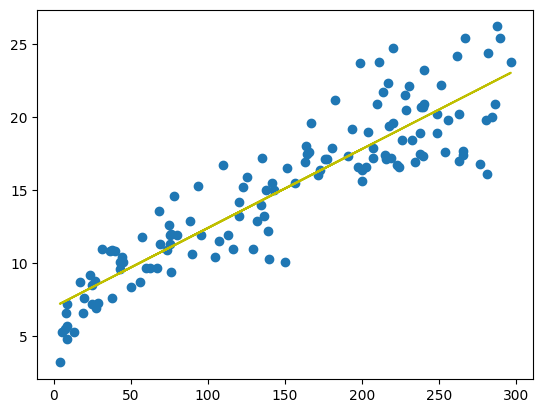

In [84]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [85]:
y_train_pred = model.predict(x_train_constants)
res = (y_train - y_train_pred)
res

138    0.314456
28    -1.601596
82     0.254113
134    1.846904
178   -5.222139
         ...   
131   -3.695392
72     0.397352
155   -3.965504
61     3.017157
9     -2.231107
Name: Sales, Length: 134, dtype: float64

In [86]:
y_train_pred

array([ 9.28554438, 20.50159571, 11.04588674,  8.95309582, 22.02213911,
       15.47671751, 17.71120782, 21.27004237, 15.84186593, 17.78205751,
       11.03498679, 18.21805562,  8.50074778, 20.02744777, 15.90726564,
       11.05678669, 19.15000157, 17.49865874,  9.01304556, 18.4306047 ,
       19.59144966, 23.09578445, 18.64315377, 19.88029841,  9.36729402,
       21.41719174, 16.517663  , 16.34326375, 21.48804143, 20.61604521,
       18.85025287, 13.99432394,  7.41075251, 12.92612858, 21.25914242,
       14.64287113, 14.54477156, 19.88029841,  7.3671527 , 10.33738981,
       19.48245013,  8.23914892, 12.79532915, 22.43633731,  7.23635327,
        9.02394551, 14.36492234, 19.38435056, 19.92389822, 13.49292612,
       18.36520498, 10.94233719, 10.19024045,  7.65600145,  8.44079804,
       16.89371136, 16.27786404, 15.96721538, 20.86129415, 12.05958234,
       18.06545628, 20.01109784,  7.99934996, 17.8311073 , 22.24013817,
       18.75760328, 10.58808872, 18.57775406, 14.26137279, 17.35

This code generates a histogram of the error terms (residuals) between the actual target values (`y_train`) and the predicted target values (`y_train_pred`). It uses seaborn's `displot` function to create the histogram with specified bins. The title of the figure is set to 'Error Terms' with a font size of 15, and the x-axis label is set to 'Difference in y_train and y_train_pred'. Finally, the plot is displayed using `plt.show()`.

<Figure size 640x480 with 0 Axes>

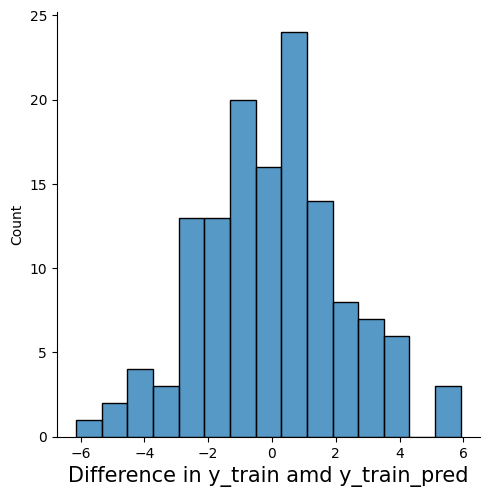

In [92]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train amd y_train_pred', fontsize = 15)
plt.show()

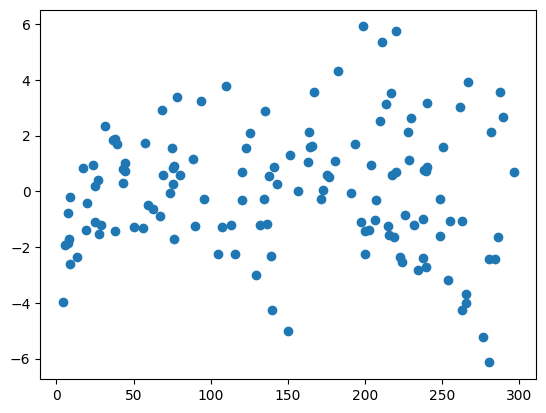

In [93]:
plt.scatter(x_train, res)
plt.show()

In [94]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)
y_pred

array([12.25578149, 22.03303906, 18.9592524 , 10.78973785, 13.53652593,
        7.66145142, 20.11464739, 11.10583648,  7.87945048, 10.54448891,
       12.53918026, 10.63713851, 18.11450607, 12.1849318 , 20.02744777,
       14.5338716 , 15.10066914, 11.86883317, 11.01318688, 13.32942683,
       17.01906082, 17.47140886, 11.61268428,  9.57439312, 12.07593227,
        6.98020438, 14.58837137,  7.91760031, 16.2179143 ,  8.33724849,
       17.17711013, 16.58851269, 16.11981472,  7.9666501 , 10.71343818,
       20.19639703,  7.87945048, 17.20980999, 19.32440082, 22.39818748,
       12.23943156, 18.73580337, 19.06280195, 14.08697354, 22.94318512,
       18.42515472, 22.7851358 , 11.69443392, 19.44975027, 17.71120782,
       16.48496314, 12.92612858, 18.8448029 ,  7.96120012, 17.01906082,
        9.85779189, 21.85863982, 14.96986971, 22.90503528, 17.59130834,
       12.97517837, 17.79295746, 18.57230408, 17.18256011, 12.4138308 ,
        7.57970178])

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

2.40192005215519

In [96]:
r2 = r2_score(y_test, y_pred)
r2


0.7946531769310443

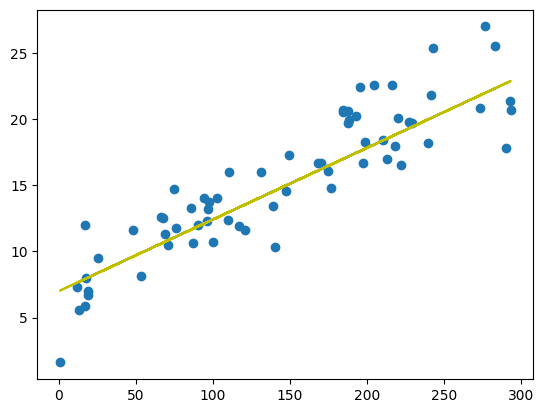

In [98]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()